# Problem :
In sri lanka increasion of the rice price is a hot topic on the stage nowadays and most of the people are pointing that industrial Mills (Araliya,  Nipuna etc) are increasing the price to get high profit. The real issue is they hiding the details of real expences about the process of making rice from paddy.




# Solution : 
for that i create this model to predict the rice price for each and every upcoming months based on the identified criteria that are effected on the rice price during past 27 Years.





# dataset:
This dataset represent the variation of the price of rice from 1996.01.01 to 2022.12.01. the the features are listed which are related on the price. Lets see the features
#



#### -> anuradhapura_producer_price	kurunegala_producer_price	polonnaruwa_producer_price
        The price that paid for the farmers to paddy collected from those districts(those 3 are the major paddy cultivating districts in SL)
        
#### -> production	
        Amout of production taken from locall

#### -> production_total	
        Total rice Need

#### -> exchange_rate	
        Exchange rate (USD to LKR) - this is usable when we exporting fertilizer,insecticides, ect

#### -> fuel_price	
        For Transporting, and all Other paddy cultivation on the field

#### -> m0	m2	m1	m2b
        Various monetary aggregates, reflecting the monetary policy and liquidity conditions that can impact rice prices.





# 
        

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
dataset = pd.read_csv("imputed_processed_data.csv")

dataset.head()

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1996-01-01,18.07,7.75,7.90,8.18,1333.6,2065.1,53.685,12.4,77071,228090,73783,260481
1,1996-02-01,18.70,8.17,8.26,8.76,1333.6,2065.1,53.685,12.4,79586,234199,77440,269496
2,1996-03-01,18.49,7.95,7.85,7.99,1333.6,2065.1,53.685,12.4,82915,239178,81796,272552
3,1996-04-01,18.52,8.25,8.01,8.29,1333.6,2065.1,54.735,12.4,80873,241893,79478,278425
4,1996-05-01,19.02,8.38,8.50,8.34,731.5,2065.1,54.950,12.4,83410,242072,76620,277365


## according to data above,
####        producer prices are quit similar (Differ from small amount)
#
#

#### Lets Visualize how the price variate during past 27 yrs

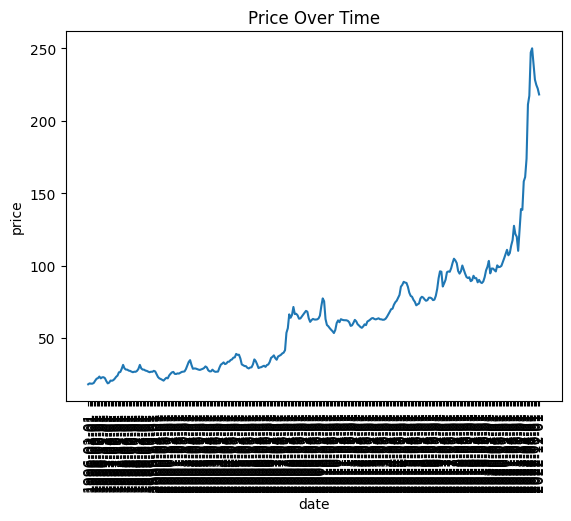

In [3]:
sns.lineplot(data=dataset , x=dataset['date'] , y=dataset['price'])
plt.title('Price Over Time')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### 

In [4]:
#get detailed dis
dataset.describe()

,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02
mean,61.975261,28.351250,28.897298,29.055802,1831.638627,3521.530556,124.167160,77.366358,4.441924e+05,2.754054e+06,4.475535e+05,3.119900e+06
std,41.524639,21.002576,21.366887,22.163859,636.826804,867.006390,55.706235,69.052940,3.724932e+05,2.890803e+06,3.822088e+05,3.229546e+06
min,18.070000,7.750000,7.810000,7.870000,731.500000,2065.100000,53.685000,12.400000,7.182800e+04,2.280900e+05,7.378300e+04,2.604810e+05
25%,28.912500,12.305000,12.202500,12.625000,1333.600000,2858.800000,96.187500,30.000000,1.213460e+05,4.924885e+05,1.293800e+05,6.044058e+05
50%,60.670000,26.025000,27.625000,26.335000,1774.500000,3380.800000,111.150000,73.000000,2.802080e+05,1.396338e+06,2.814140e+05,1.664421e+06
75%,80.177500,37.312500,37.262500,37.262500,2135.600000,4300.600000,144.895000,104.000000,7.437918e+05,4.215070e+06,7.077622e+05,4.741758e+06
max,250.070000,131.550000,141.950000,138.200000,3196.750000,5149.600000,368.500000,460.000000,1.481805e+06,1.049705e+07,1.635133e+06,1.228964e+07



#
### According to above table most of the features
        -median and mean are mostly same (Differ from small amounts comapred to its Q values) in some features (symmatry is there)
        -mean values of the producer prices in each dist. are mostly same, so its good to take average producer price insted of those 3.
        -scalling is needed


            

In [5]:
#checking null
dataset.isnull().sum()

date                           0
price                          0
anuradhapura_producer_price    0
kurunegala_producer_price      0
polonnaruwa_producer_price     0
production                     0
production_total               0
exchange_rate                  0
fuel_price                     0
m0                             0
m2                             0
m1                             0
m2b                            0
dtype: int64

#### There are no Null Values
#

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         324 non-null    object 
 1   price                        324 non-null    float64
 2   anuradhapura_producer_price  324 non-null    float64
 3   kurunegala_producer_price    324 non-null    float64
 4   polonnaruwa_producer_price   324 non-null    float64
 5   production                   324 non-null    float64
 6   production_total             324 non-null    float64
 7   exchange_rate                324 non-null    float64
 8   fuel_price                   324 non-null    float64
 9   m0                           324 non-null    int64  
 10  m2                           324 non-null    int64  
 11  m1                           324 non-null    int64  
 12  m2b                          324 non-null    int64  
dtypes: float64(8), int64

# 

#### here the date is Object typed, so we need to convert it. by the way here we just consider the month and year to catch the seasonal patterns of the price. (lets see the pattern from a graph)

#### and get the average producer price by getting the mean of all 3 districts
#

In [7]:
#process the date 
dataset['date']= pd.to_datetime(dataset['date'])
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month

dataset['average_price'] = dataset[['anuradhapura_producer_price', 'kurunegala_producer_price', 'polonnaruwa_producer_price']].mean(axis=1)
dataset = dataset.drop('anuradhapura_producer_price' , axis=1)
dataset = dataset.drop('kurunegala_producer_price' , axis=1)
dataset = dataset.drop('polonnaruwa_producer_price' , axis=1)

dataset = dataset.drop('date' , axis=1)
dataset.head()

,price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b,year,month,average_price
0,18.07,1333.6,2065.1,53.685,12.4,77071,228090,73783,260481,1996,1,7.943333
1,18.70,1333.6,2065.1,53.685,12.4,79586,234199,77440,269496,1996,2,8.396667
2,18.49,1333.6,2065.1,53.685,12.4,82915,239178,81796,272552,1996,3,7.930000
3,18.52,1333.6,2065.1,54.735,12.4,80873,241893,79478,278425,1996,4,8.183333
4,19.02,731.5,2065.1,54.950,12.4,83410,242072,76620,277365,1996,5,8.406667


#### Now the dataset is quit better than previous
#
#

# lets plot the chart to see the price variations during each years

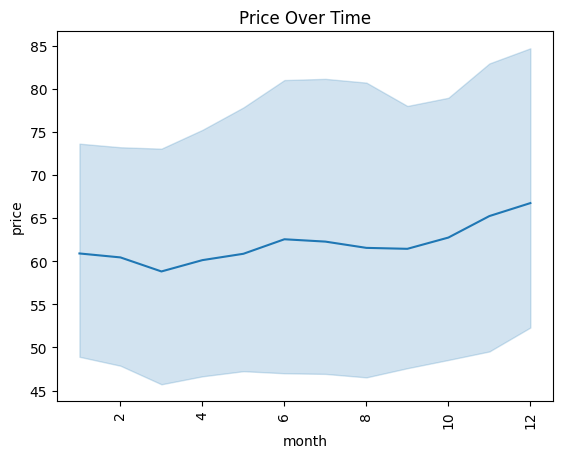

In [8]:
sns.lineplot(data=dataset , x=dataset['month'] , y=dataset['price'])
plt.title('Price Over Time')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# 

### According to graph we can see
        price increasons at 6th and 12th months(like 2 periods) with respect to Yala and Maha seasons.
        during the month 3 and 4 are recorded quite low price (Mostly due to New Year season)
        and the december month has quit high price compared to other months.(Nowadays we experiencing it)

#


In [9]:
#lets split the data
x = dataset.drop('price' , axis=1)
y = dataset['price']

x_tr ,x_ts , y_tr , y_ts = train_test_split(x , y , test_size=0.2  , random_state=42)
# we caught 80% of dataset as training dataset

#
#

##### used Min-Max scaler to transform the values between 0 and 1

                                        scaledValue = (X - Xmin)/(Xmax - Xmin)

In [10]:
#scale the fuaturews
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
scaler = MinMaxScaler()


x_tr = scaler.fit_transform(x_tr)
x_ts = scaler.fit_transform(x_ts)

#print(x_tr , x_ts)

##### Sine im going through ensamble learning method I selected random forest and XBGRegressor models.
##### the reason for consider random forest,
        - reduce overfitting through multiple trees compared to a single tree,
        - understand the featurs which are mostly effecting on rice price
        - since it using multiple trees with resampling it will give accurate results
#
##### reasons for consider XGBRegressor
        - since it based on boosting it correct the errors happend with past tree
        - reduce overfitting through regularization
        - computational efficiency

#


In [11]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [12]:
#rf paramerters
rfpara ={
    'n_estimators' : [100,150,200,250],
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,3,4,5]
}

xgbrPara={
    'n_estimators' : [100,150,200,250],
    'learning_rate':[0.001 , 0.003 , 0.005 ,0.004],
    'max_depth':[2,3,4]
}


#Use Time series Cross Validation
tscv = TimeSeriesSplit(n_splits=5)

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42) , rfpara , cv=tscv , n_jobs=-1)
grid_xgbr = GridSearchCV(XGBRegressor(random_state=42) , xgbrPara , cv=tscv  , n_jobs=-1)


grid_rf.fit(x_tr , y_tr)
grid_xgbr.fit(x_tr , y_tr)

print(f"best est for rf {grid_rf.best_params_}")
print(f"best est for XGBRegressor {grid_xgbr.best_params_}")
models = {
    'rf' : grid_rf.best_estimator_,
    'xgbr': grid_xgbr.best_estimator_
}

best est for rf {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
best est for XGBRegressor {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 250}


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#
#
# Train and Evaluation
# 

rf:
  RMSE: 5.132285455116004
  MAE: 3.731732556241248
  R^2: 0.9825581451583243


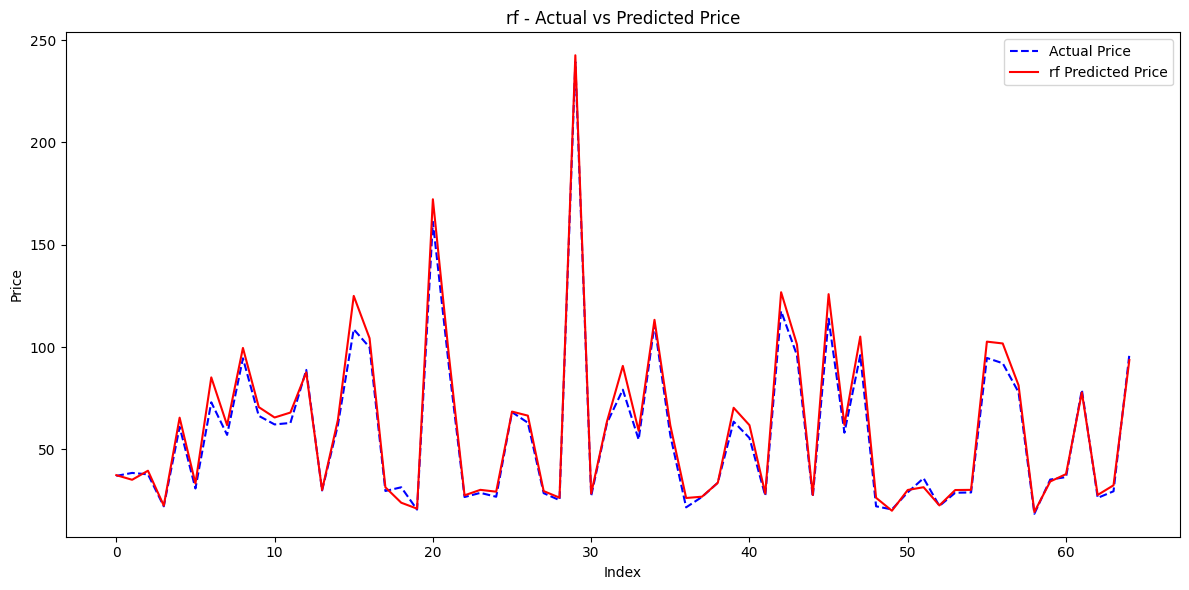

xgbr:
  RMSE: 12.644478377135348
  MAE: 8.884424189640924
  R^2: 0.8941300039808913


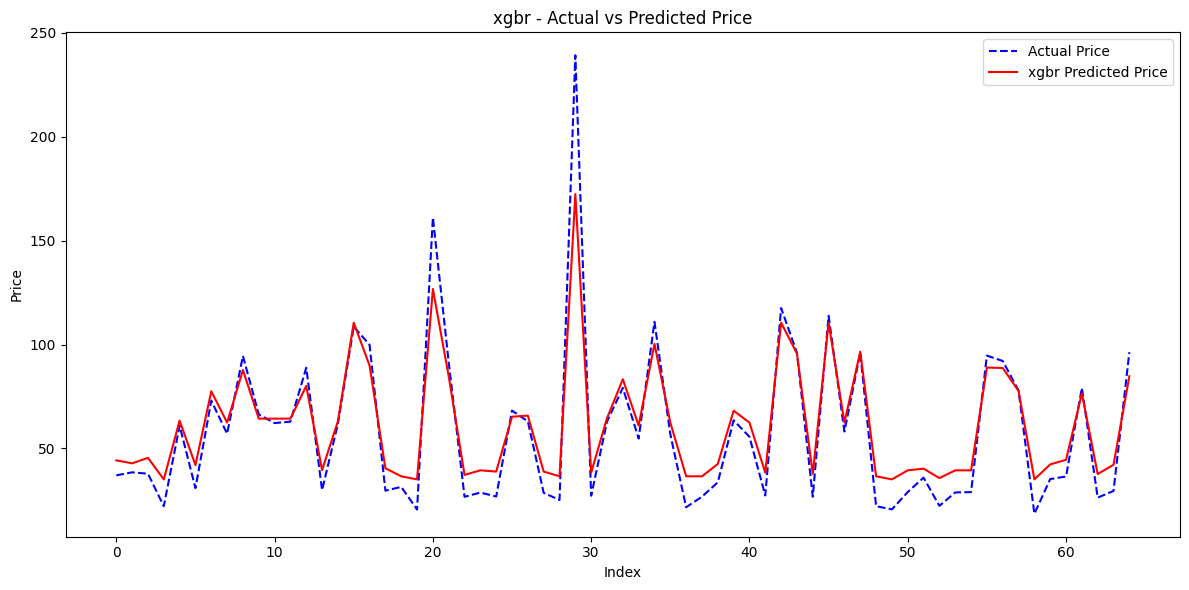

In [14]:
results = {}
for name , model in models.items():
    model.fit(x_tr , y_tr)
    preds = model.predict(x_ts)

    rmse = np.sqrt(mean_squared_error(y_ts , preds))
    mae = mean_absolute_error(y_ts , preds)
    rSquare = r2_score(y_ts , preds)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': rSquare}
    print(f"{name}:")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {rSquare}")



    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_ts)), y_ts, label='Actual Price', color='blue', linestyle='--')
    plt.plot(np.arange(len(y_ts)), preds, label=f'{name} Predicted Price', color='red', linestyle='-')
    plt.title(f'{name} - Actual vs Predicted Price')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

#
#### when we consider above graphs, the randomForest perform well. During Testing it covered the pattern very accurately and the error is significantly low 

#
##### Random Forest
    - The predicted price deviation from the actual price is very low (~5.1322) compared to the mean price of the dataset (61.975) the deviation is very low(Root MSE)
    - the predicted priced are within 3.73 of the actual value, which is also a good number
    - accorinding to R^2 98.26% of the varience in the price has been explained by the model.
    - so the model is capturing the relations and patterns with the features with low error.

##### XGBRegressor
    - pred. price deviate 12.64 from the actual value
    - predicted prices within 8.88 of the actual value, a slght large number 
    - 89.4% accurate is there which is a good value

#
#### Comparison
    - when we compare the MSE and RMSE the random forest is perform better than the XGBRegressor
    - also with the accuracu RF is capture more varinec in the price comared to XGBRegressor
    - when we inspecting the above graph, then also we can see that RF perform better than XGBR



### So the final selected model would be Random Forest 
#

In [15]:
dataset.describe()
#jsut to memorize the features of the dataset

,price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b,year,month,average_price
count,324.000000,324.000000,324.000000,324.000000,324.000000,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,324.000000,324.000000,324.000000
mean,61.975261,1831.638627,3521.530556,124.167160,77.366358,4.441924e+05,2.754054e+06,4.475535e+05,3.119900e+06,2009.000000,6.500000,28.768117
std,41.524639,636.826804,867.006390,55.706235,69.052940,3.724932e+05,2.890803e+06,3.822088e+05,3.229546e+06,7.800929,3.457392,21.479348
min,18.070000,731.500000,2065.100000,53.685000,12.400000,7.182800e+04,2.280900e+05,7.378300e+04,2.604810e+05,1996.000000,1.000000,7.930000
25%,28.912500,1333.600000,2858.800000,96.187500,30.000000,1.213460e+05,4.924885e+05,1.293800e+05,6.044058e+05,2002.000000,3.750000,12.329167
50%,60.670000,1774.500000,3380.800000,111.150000,73.000000,2.802080e+05,1.396338e+06,2.814140e+05,1.664421e+06,2009.000000,6.500000,26.828333
75%,80.177500,2135.600000,4300.600000,144.895000,104.000000,7.437918e+05,4.215070e+06,7.077622e+05,4.741758e+06,2016.000000,9.250000,37.228667
max,250.070000,3196.750000,5149.600000,368.500000,460.000000,1.481805e+06,1.049705e+07,1.635133e+06,1.228964e+07,2022.000000,12.000000,137.233333


In [16]:
selectedmodel = min(results , key=lambda  x: results[x]['RMSE'])
print(f"{selectedmodel}")
finalmodel = models[selectedmodel]

rf


In [21]:
randInput = {
    
    'production':2231.2,
    'production_total':3392.875,
    'exchange_rate':291.15,
    'fuel_price':291.0,
    'm0':1949389,
    'm2':10497052,
    'm1':1453597,
    'm2b':1453597,
    'year' : 2024,
    'month':12,
    'average_price':90.46
}

# for the monetory aggregations i put values available in the dataset and the other features updated with the realtime data in today to see the predicion

randomframe = pd.DataFrame([randInput])
scled_input = scaler.transform(randomframe) 

predicted_price = finalmodel.predict(scled_input)
#value = scaler.inverse_transform(predicted_price.reshape(-1, 1))


#original_price = scaler.inverse_transform(predicted_price[0])
print(f"Predicted Price for Random Input: {predicted_price[0]}")

Predicted Price for Random Input: 185.1106006676819


##### model predict that the price would be 191.16 
##### which means it would be 191.16 +/- RMSE
##### which means 191.16 +/- 5.12
#### so the price would be between 186.04 and 196.28

In [18]:
dataset.tail(1)
#229.6524666666665


,price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b,year,month,average_price
323,218.2,1931.2,3392.875,367.5,420.0,1349389,10497052,1453597,12289637,2022,12,100.706667
